<a href="https://colab.research.google.com/github/shanksghub/Pandas-AI-and-ML-demo/blob/main/AI%2C%20Pandas%20etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Import libraries
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams
from numpy import absolute

from sklearn.preprocessing import MinMaxScaler
from numpy import mean
from numpy import std
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import numpy

"""## Loading the data"""
url = 'https://raw.githubusercontent.com/shanksghub/Pandas-AI-and-ML-demo/main/Sheet.csv'
#myfile = glob.glob(r'C:\Users\yadavsha\fermentation_reports.csv')
data_frame = pd.read_csv(url)



In [2]:
data_frame

,Unnamed:0,52,Attribute A,Attribute B,Attribute C,Attribute D,Attribute E,Attribute F,Attribute G,Attribute H,Attribute I,Attribute J,Attribute K,Target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.068224,0.370103,0.006830,0.322365,0.450483,0.933428,0.670428,0.893591,0.511430,0.324416,0.615224,0.540411,0.806968,0.513738
2,0.787075,0.632186,0.717796,0.789373,0.764626,0.810753,0.986562,0.483302,0.723648,0.100280,0.897831,0.812922,0.159603,0.860984
3,0.771956,0.436974,0.156137,0.459122,0.139779,0.035185,0.868712,0.155383,0.092804,0.447937,0.493186,0.908616,0.252380,0.587039
4,0.809863,0.638679,0.543846,0.965284,0.326152,0.210719,0.595291,0.007420,0.597838,0.032168,0.203885,0.938989,0.439535,0.102827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.891002,0.340960,0.956735,0.083735,0.653642,0.045730,0.314363,0.129850,0.950663,0.152616,0.957824,0.498808,0.275052,0.156660
997,0.146464,0.021343,0.472627,0.241885,0.763425,0.276291,0.406793,0.646784,0.488769,0.901783,0.078085,0.974616,0.336593,0.653933
998,0.077508,0.051637,0.229866,0.738846,0.626654,0.549985,0.121926,0.975885,0.846103,0.345245,0.264670,0.872988,0.799753,0.938184
999,0.025839,0.870381,0.465554,0.441882,0.291010,0.970584,0.288502,0.117051,0.707560,0.838301,0.158587,0.489032,0.840040,0.235884


In [3]:
"""## Exploring the data"""

pd.set_option('display.max_columns', None)

data_frame

data_frame.shape


data_frame = data_frame.drop(["Unnamed:0",'52'],axis=1)



data_frame

print(data_frame.head())


   Attribute A  Attribute B  Attribute C  Attribute D  Attribute E  \
0          NaN          NaN          NaN          NaN          NaN   
1     0.006830     0.322365     0.450483     0.933428     0.670428   
2     0.717796     0.789373     0.764626     0.810753     0.986562   
3     0.156137     0.459122     0.139779     0.035185     0.868712   
4     0.543846     0.965284     0.326152     0.210719     0.595291   

   Attribute F  Attribute G  Attribute H  Attribute I  Attribute J  \
0          NaN          NaN          NaN          NaN          NaN   
1     0.893591     0.511430     0.324416     0.615224     0.540411   
2     0.483302     0.723648     0.100280     0.897831     0.812922   
3     0.155383     0.092804     0.447937     0.493186     0.908616   
4     0.007420     0.597838     0.032168     0.203885     0.938989   

   Attribute K    Target  
0          NaN       NaN  
1     0.806968  0.513738  
2     0.159603  0.860984  
3     0.252380  0.587039  
4     0.439535  0.10282

In [4]:
correlationmatrix = data_frame.corr()

print(correlationmatrix)

print(correlationmatrix.nlargest(10,'Target')['Target'])

print(data_frame.count())



data_frame.head()

data_frame.shape

print(data_frame.describe().round(2))



             Attribute A  Attribute B  Attribute C  Attribute D  Attribute E  \
Attribute A     1.000000     0.025849    -0.041589     0.007556     0.039532   
Attribute B     0.025849     1.000000    -0.001263    -0.001204    -0.049551   
Attribute C    -0.041589    -0.001263     1.000000     0.013646     0.031262   
Attribute D     0.007556    -0.001204     0.013646     1.000000    -0.006024   
Attribute E     0.039532    -0.049551     0.031262    -0.006024     1.000000   
Attribute F    -0.024812    -0.012883    -0.015634     0.021366    -0.045920   
Attribute G     0.004202    -0.004446     0.060542    -0.014267    -0.013217   
Attribute H    -0.028944     0.018735    -0.026622    -0.006442     0.043232   
Attribute I     0.003539     0.014845     0.034517     0.010724    -0.051093   
Attribute J     0.053732     0.009418     0.054237    -0.015914     0.052597   
Attribute K    -0.063837    -0.008796     0.023006     0.037283    -0.086938   
Target         -0.054744     0.018642   

In [5]:


chosen_variables= ['Attribute A', 'Attribute B', 'Attribute C', 'Attribute D','Attribute E', 'Attribute F','Attribute G','Attribute H','Attribute I','Attribute J','Attribute K']

sns.set(font_scale = 1)

rcParams['figure.figsize'] = 15,10

In [6]:
data_frame.head()


,Attribute A,Attribute B,Attribute C,Attribute D,Attribute E,Attribute F,Attribute G,Attribute H,Attribute I,Attribute J,Attribute K,Target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.006830,0.322365,0.450483,0.933428,0.670428,0.893591,0.511430,0.324416,0.615224,0.540411,0.806968,0.513738
2,0.717796,0.789373,0.764626,0.810753,0.986562,0.483302,0.723648,0.100280,0.897831,0.812922,0.159603,0.860984
3,0.156137,0.459122,0.139779,0.035185,0.868712,0.155383,0.092804,0.447937,0.493186,0.908616,0.252380,0.587039
4,0.543846,0.965284,0.326152,0.210719,0.595291,0.007420,0.597838,0.032168,0.203885,0.938989,0.439535,0.102827


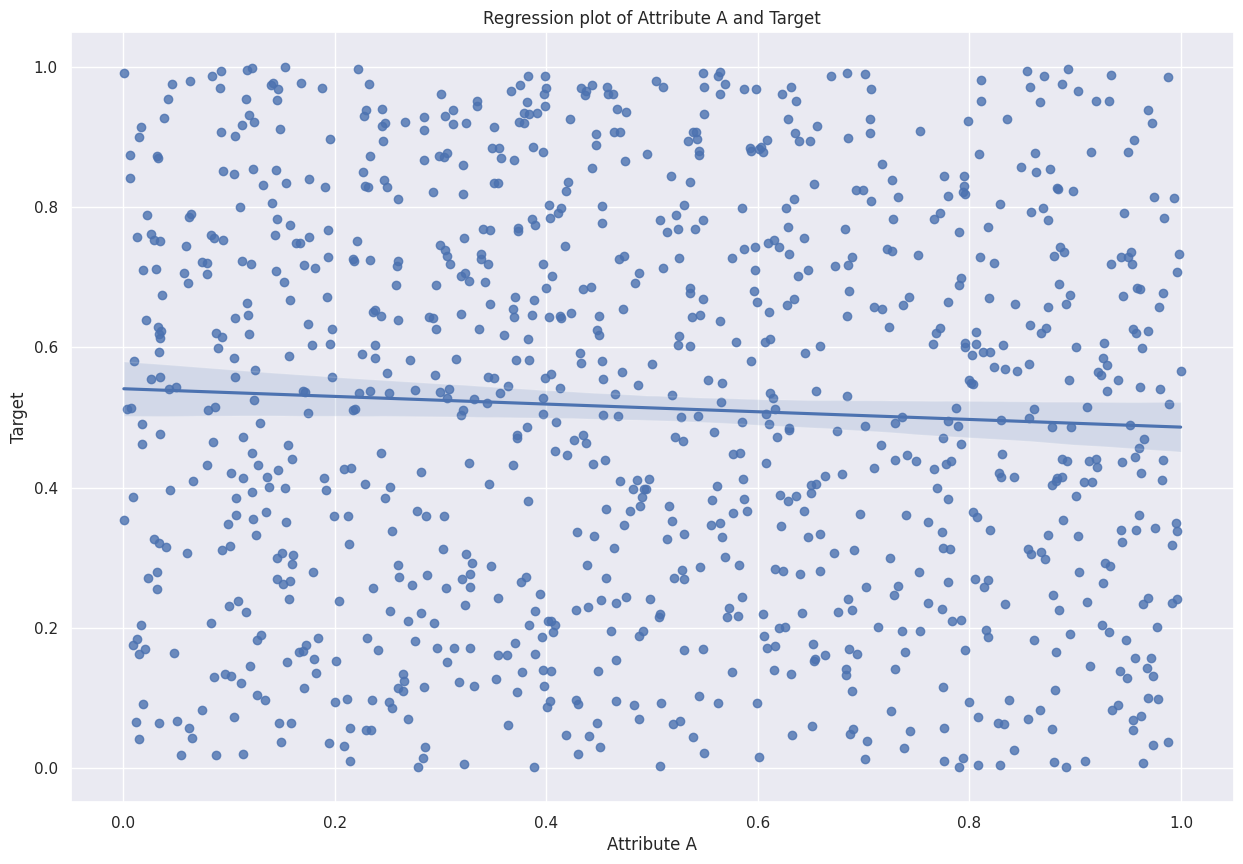

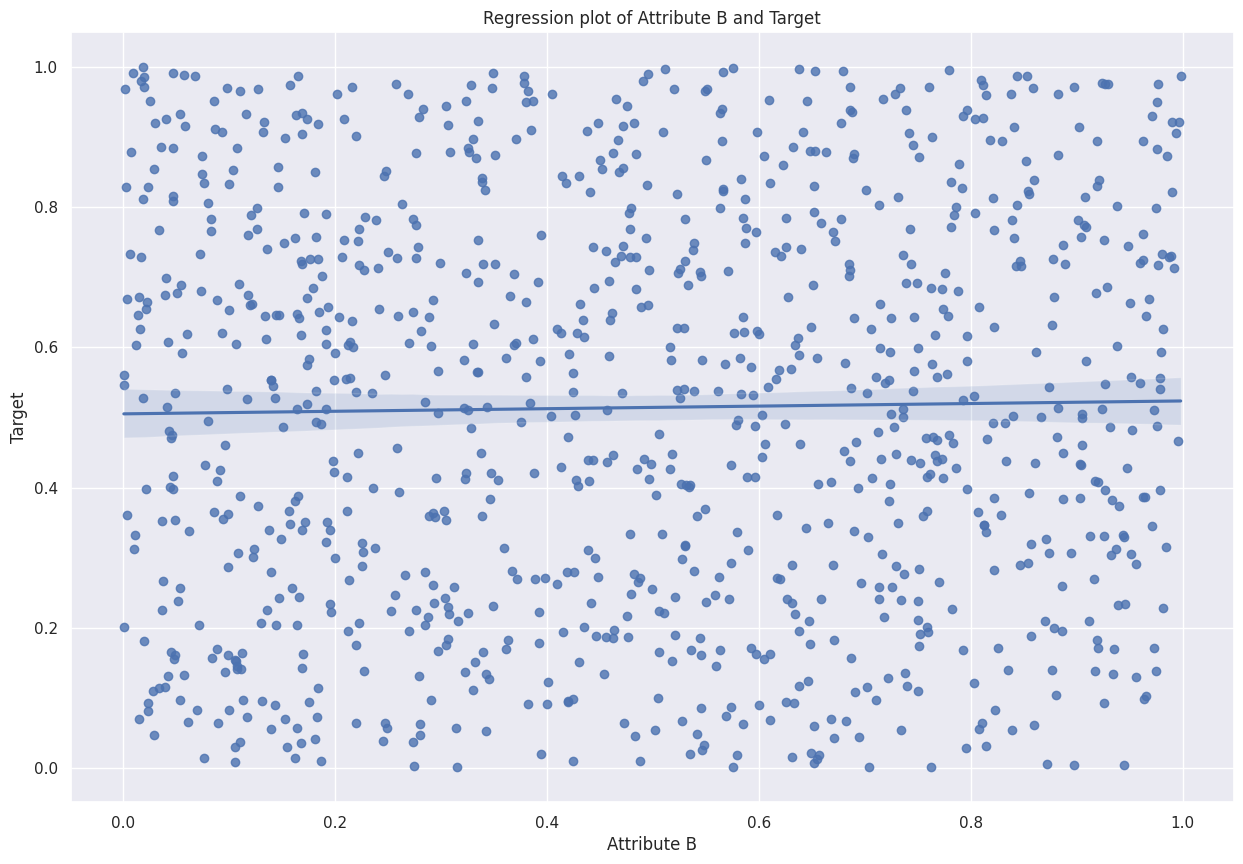

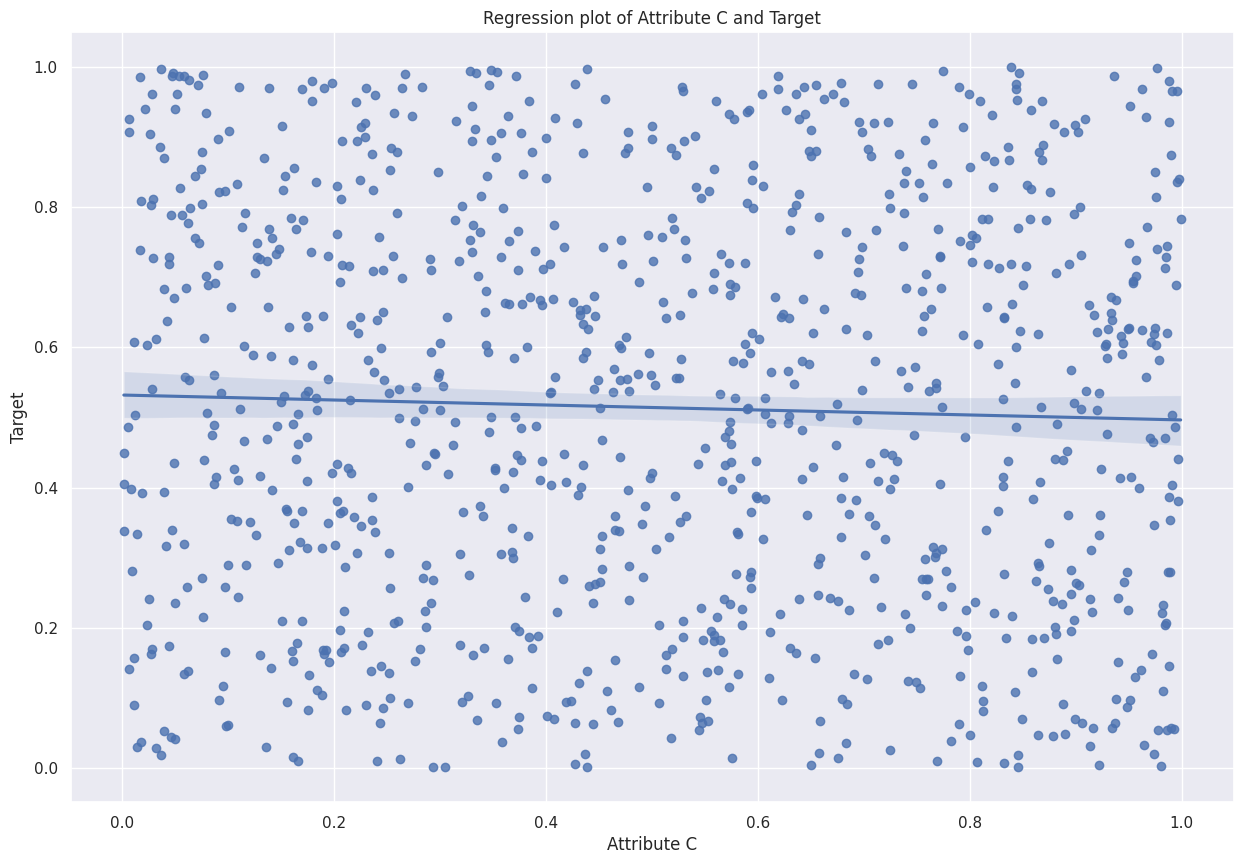

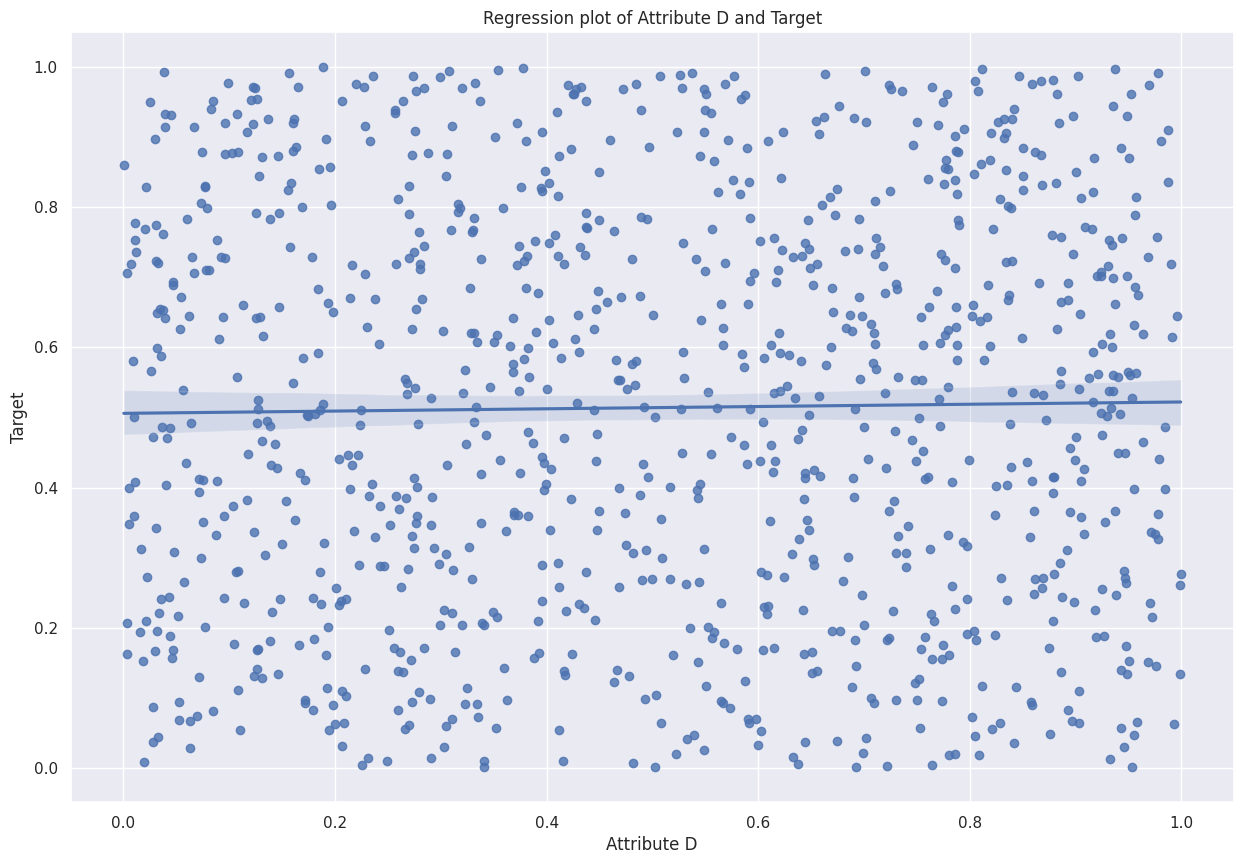

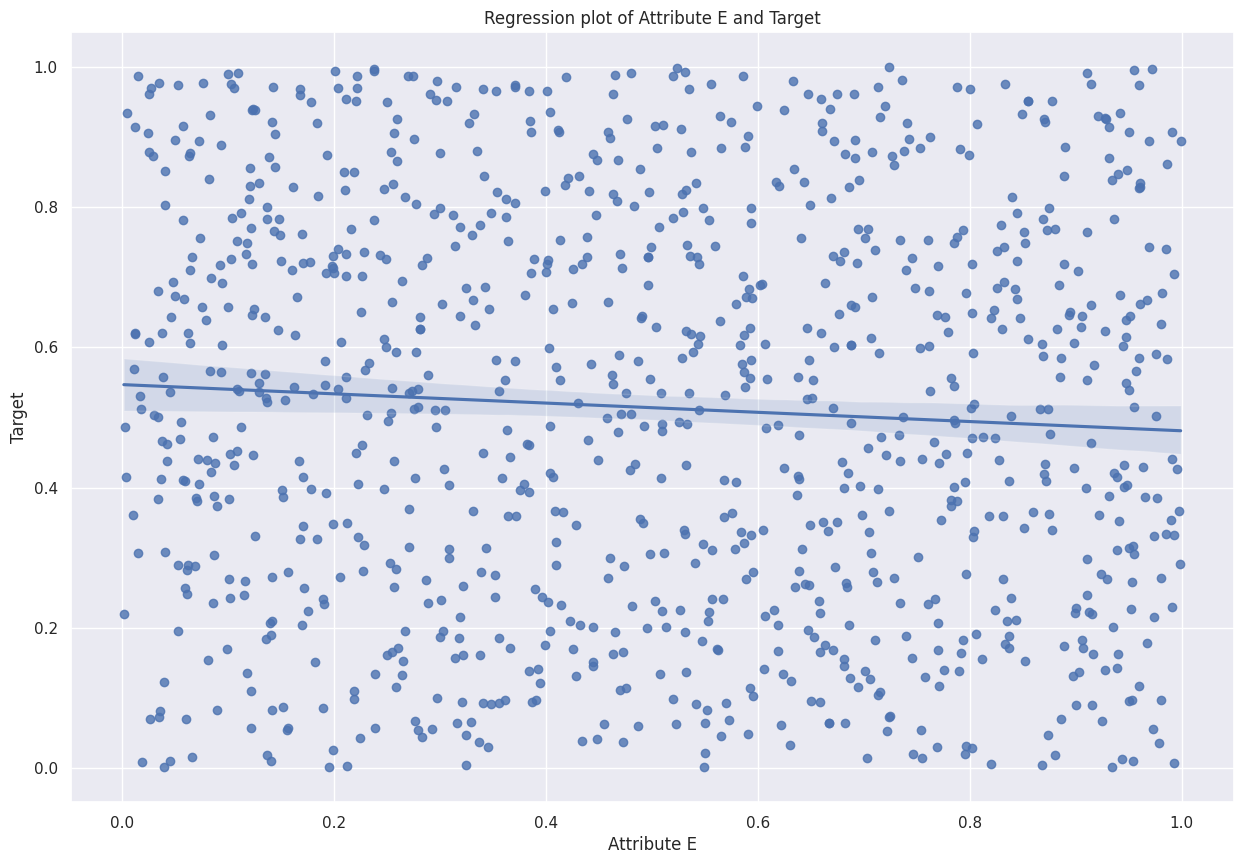

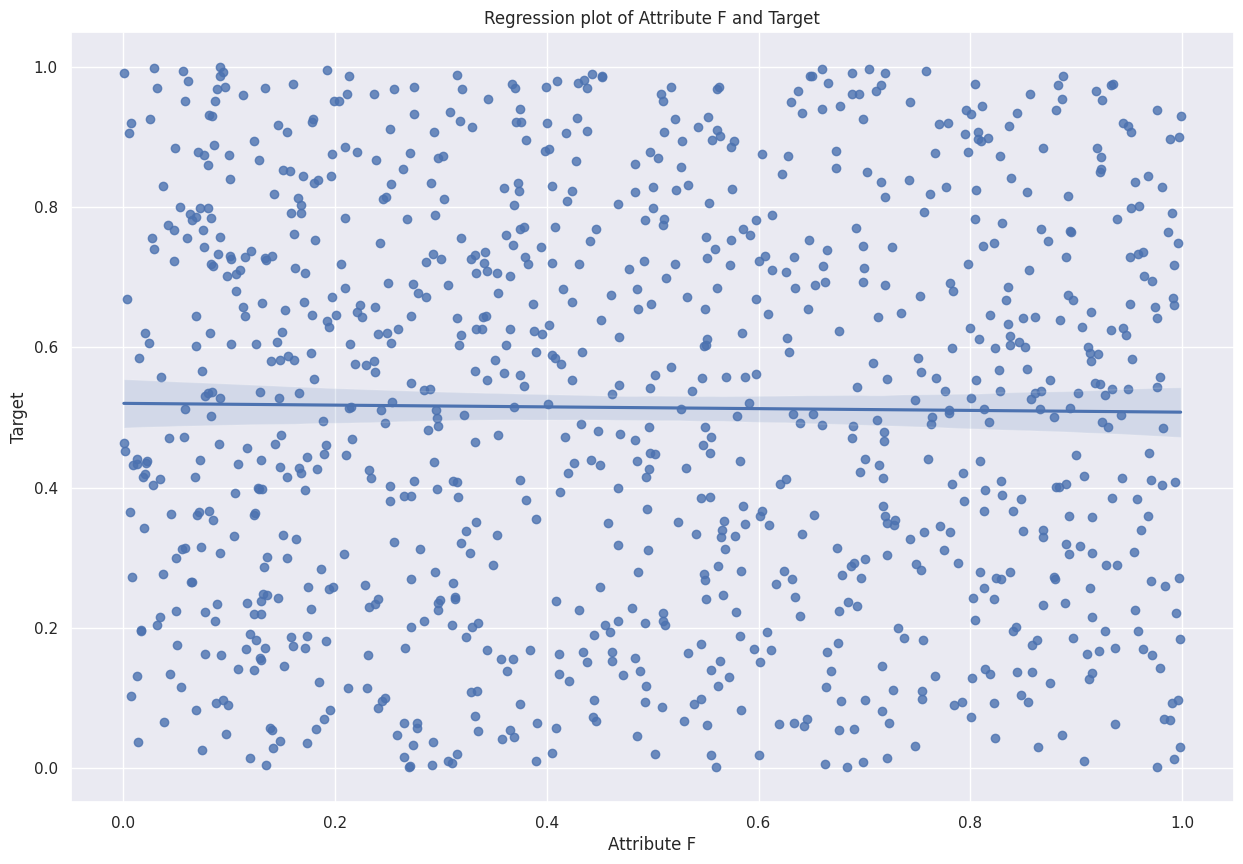

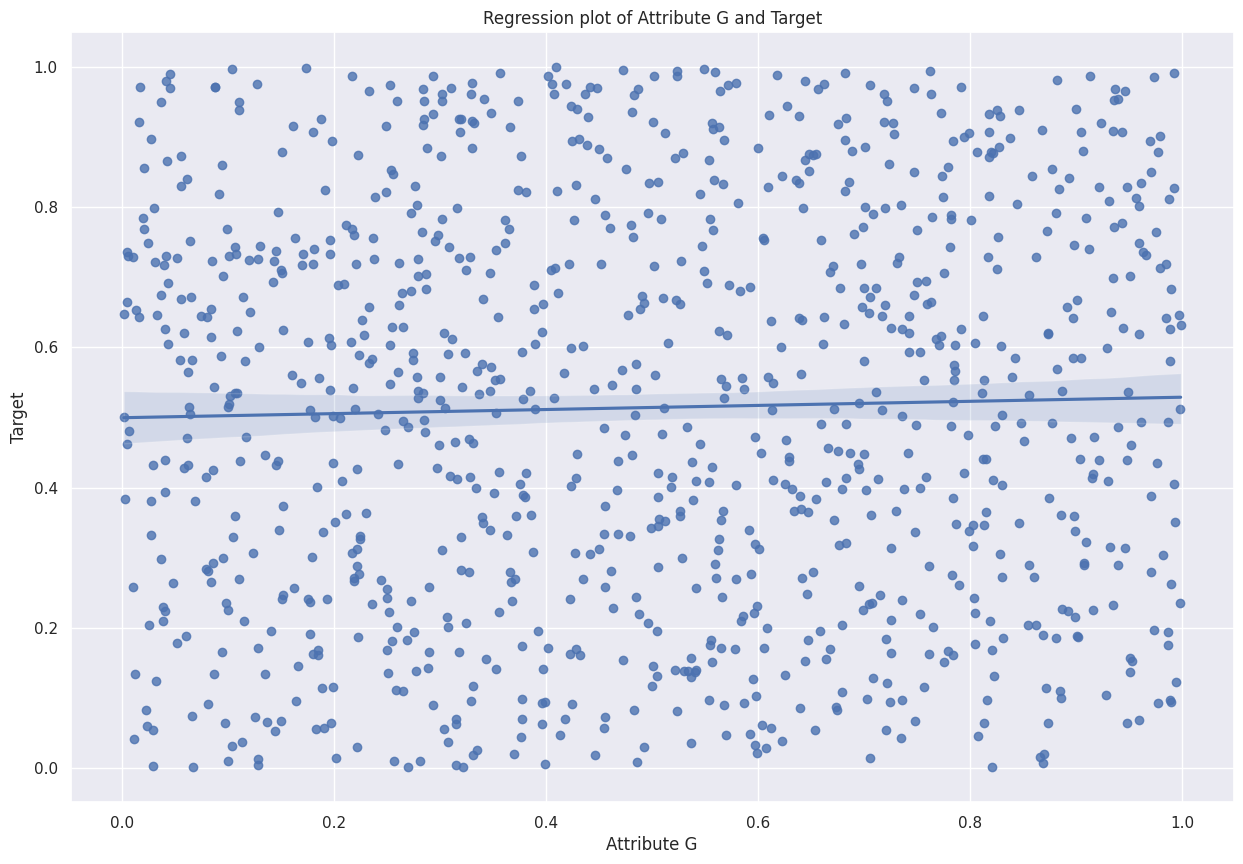

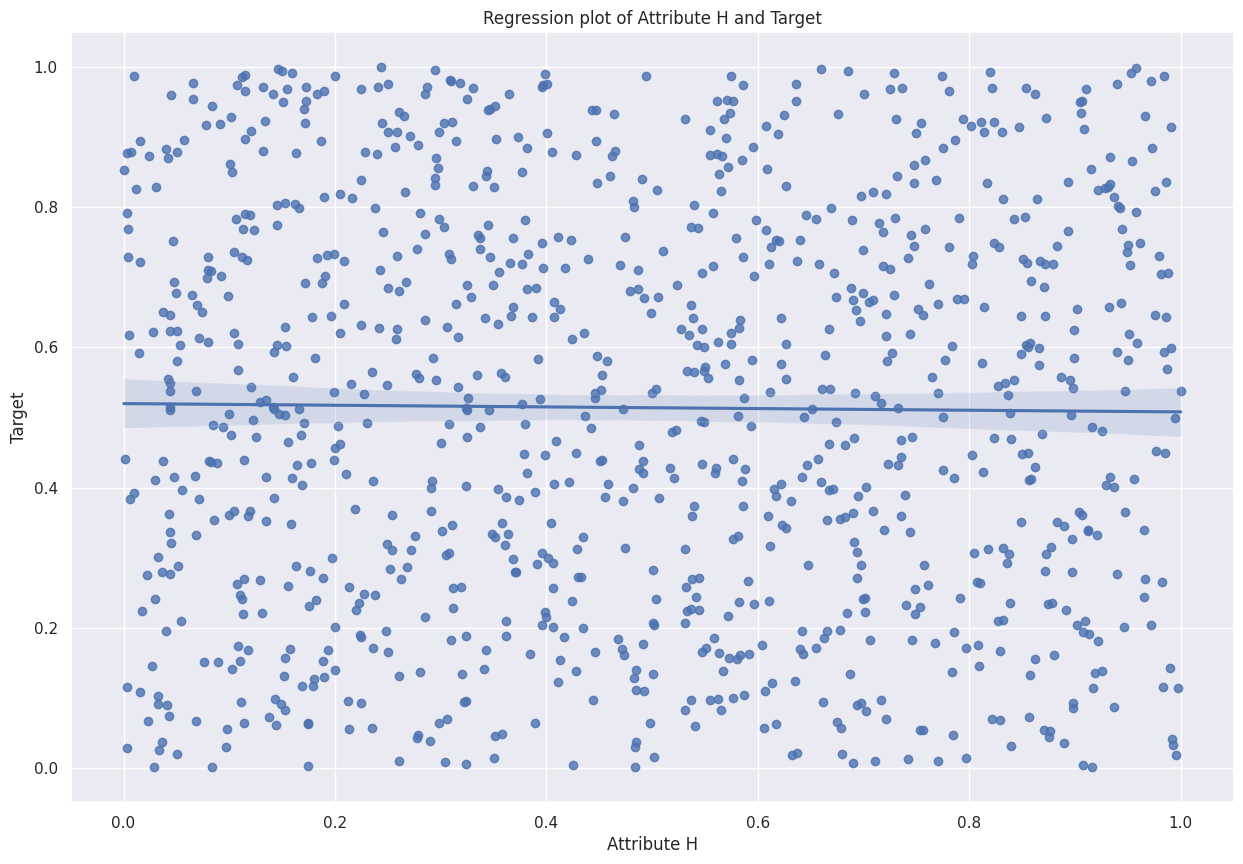

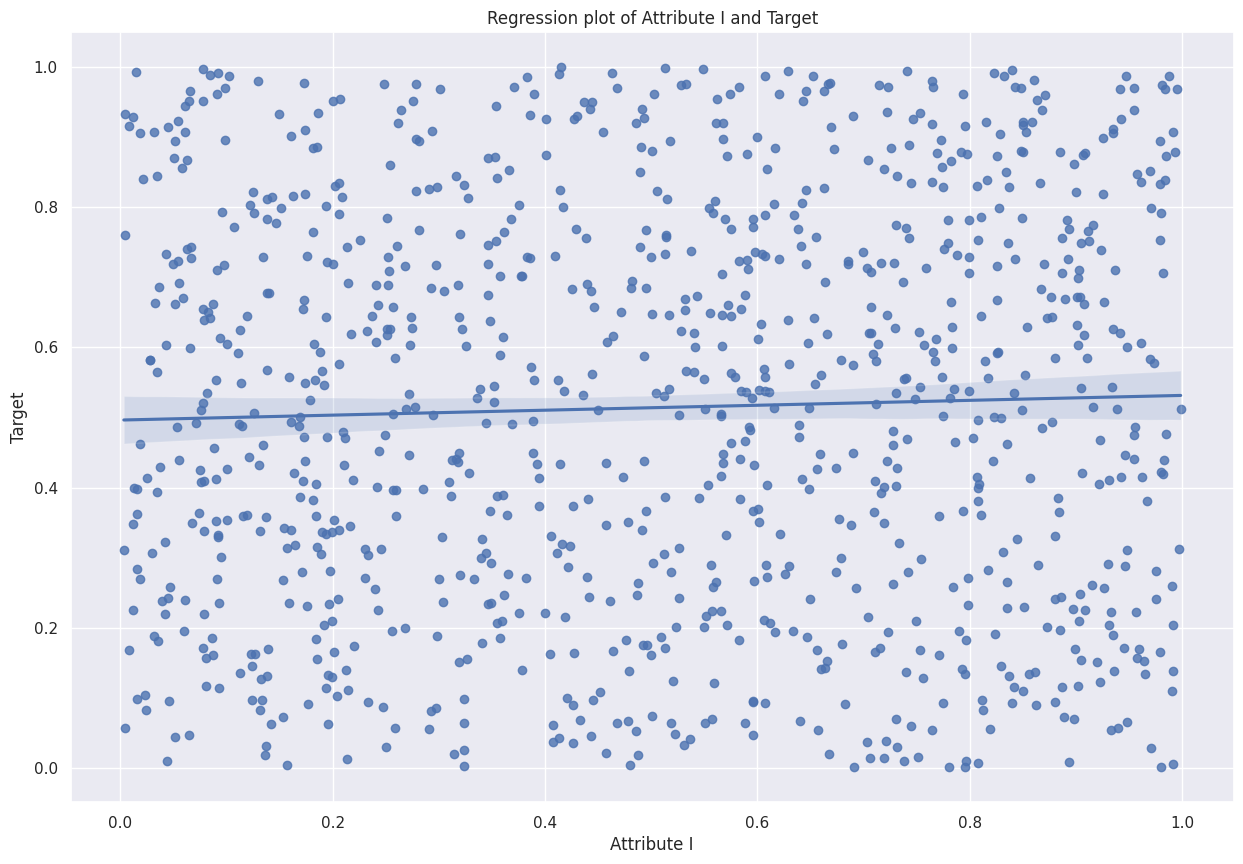

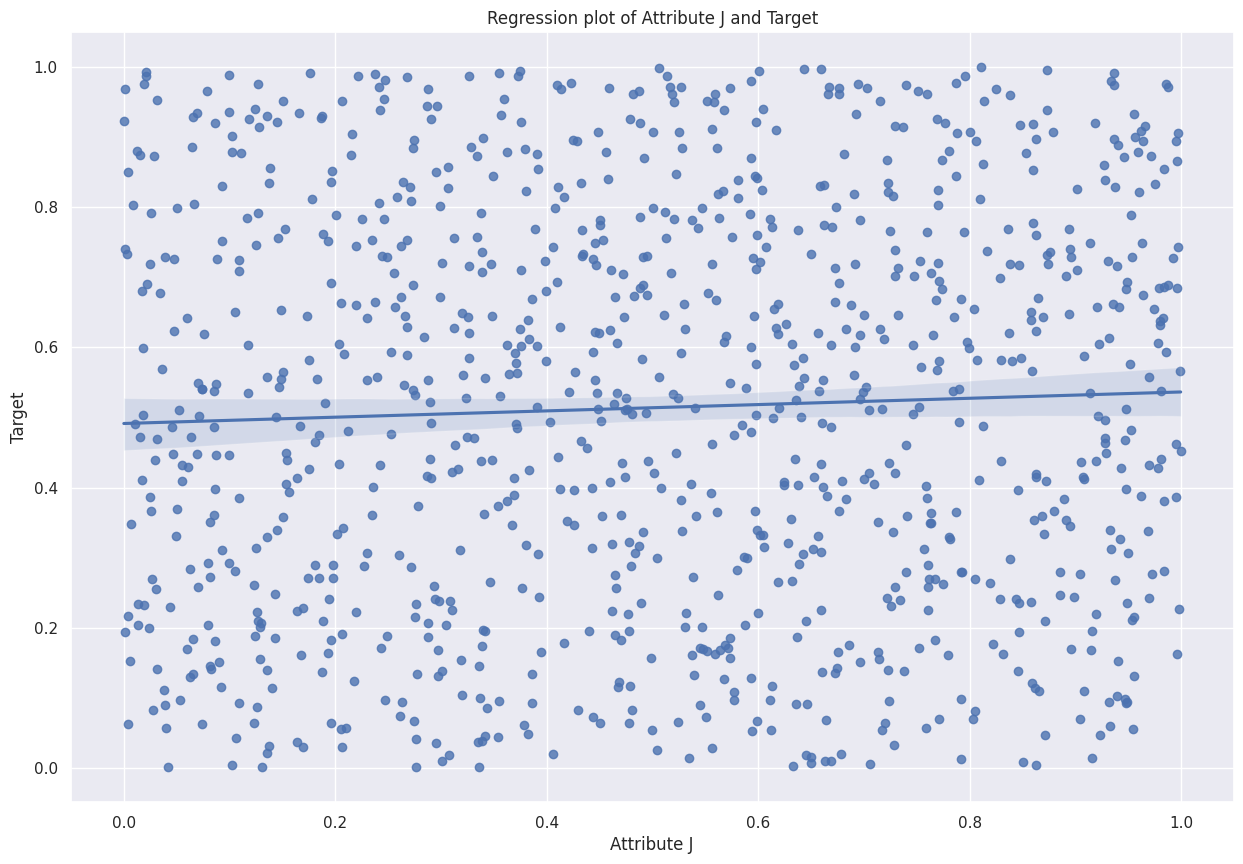

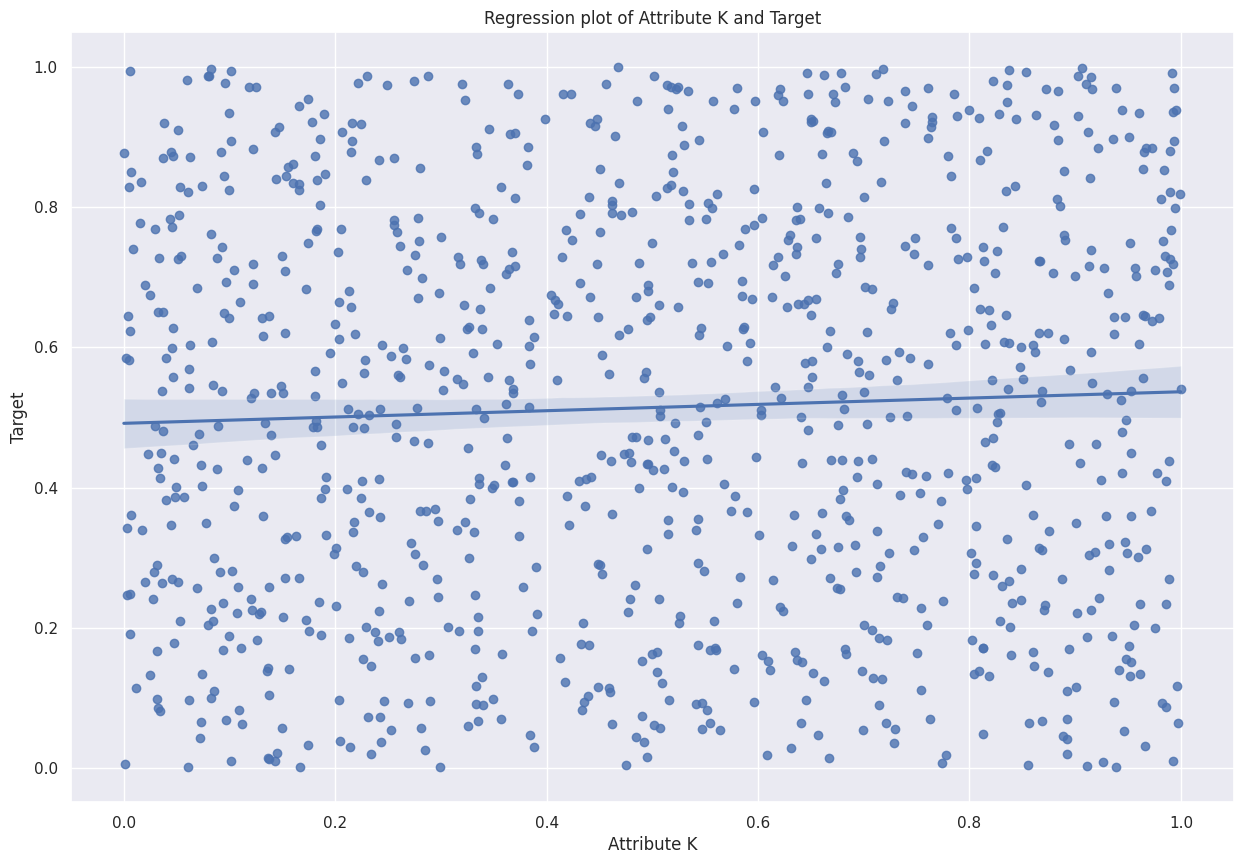

In [7]:
for i in chosen_variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line

    sns.regplot(x=i, y='Target', data=data_frame).set(title=f'Regression plot of {i} and Target')


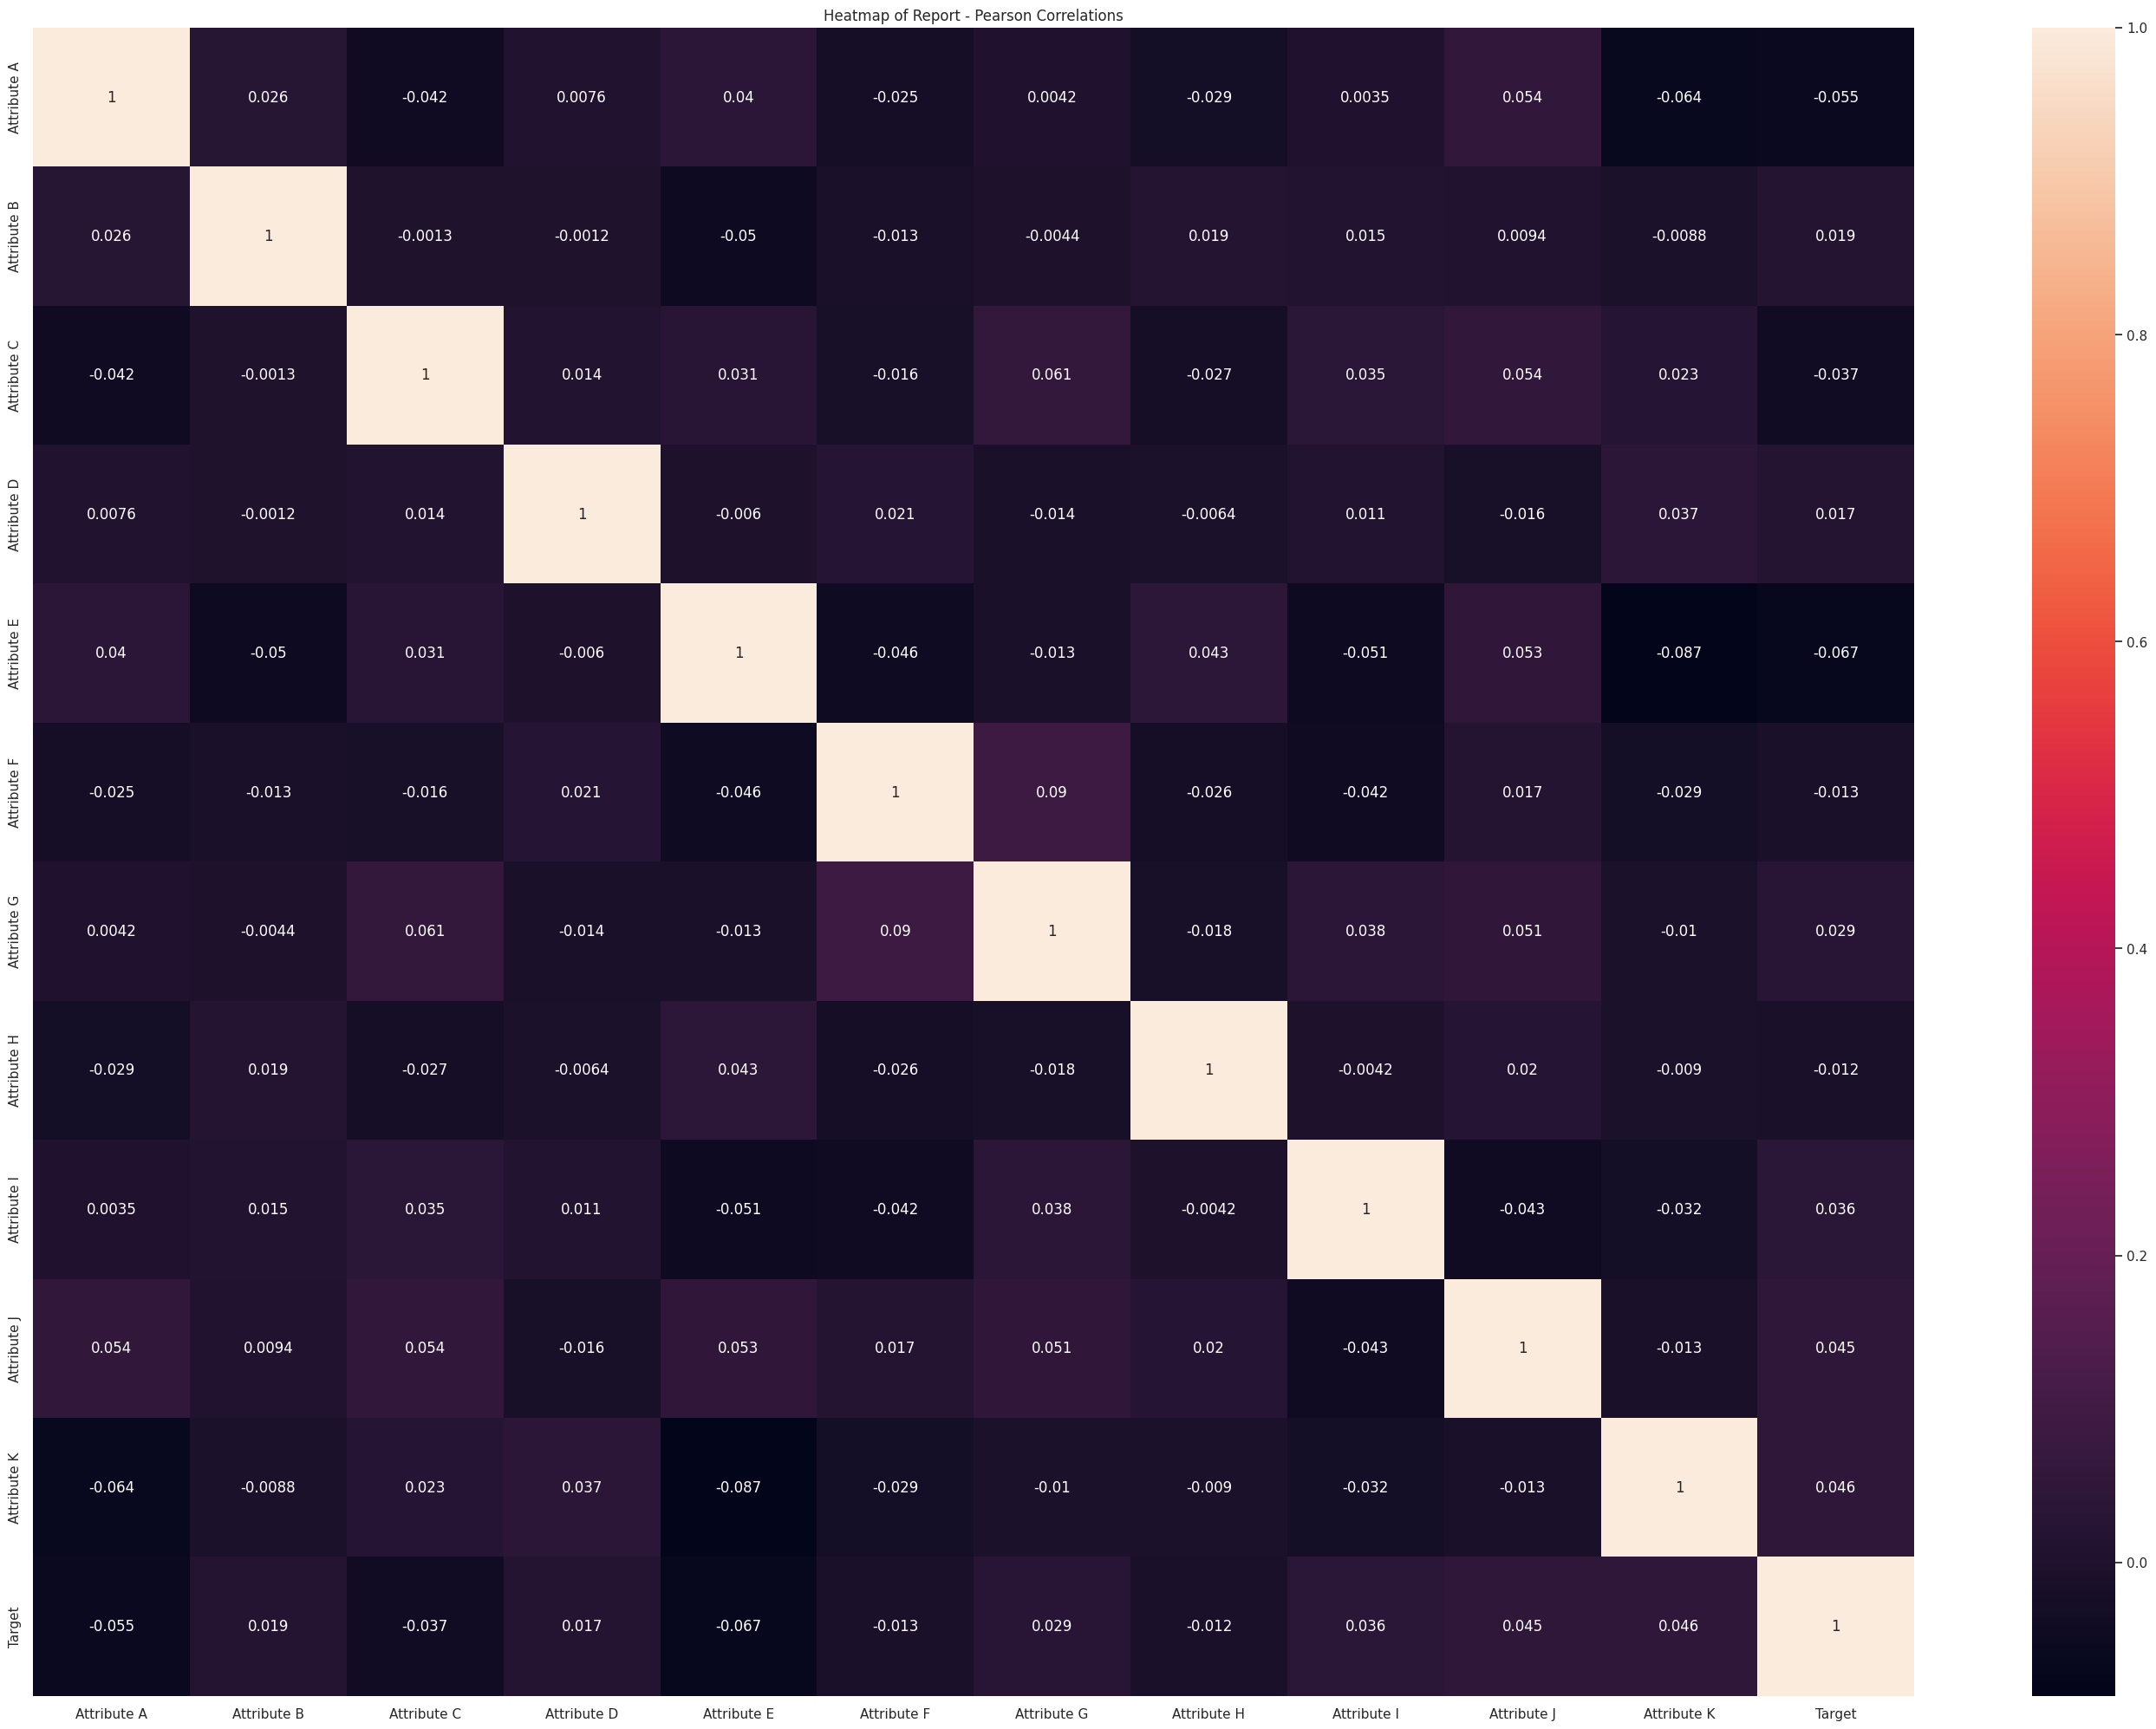

In [8]:
sns.set(rc = {'figure.figsize':(35,25)})

sns.heatmap(correlationmatrix, annot=True).set(title='Heatmap of Report - Pearson Correlations')

"""## Data Cleaning"""

#identify partial string to look for
remove = ["nan"]

#drop rows that contain the partial string "Sum" in the conference column
data_frame=data_frame[data_frame['Target'].astype(str).str.contains('|'.join(remove))==False]#,na=False)]






In [9]:
data_frame.shape

from sklearn.model_selection import train_test_split
SEED = 44

y_imputed = data_frame.fillna((data_frame.mean()))



y_imputed.head()

,Attribute A,Attribute B,Attribute C,Attribute D,Attribute E,Attribute F,Attribute G,Attribute H,Attribute I,Attribute J,Attribute K,Target
1,0.006830,0.322365,0.450483,0.933428,0.670428,0.893591,0.511430,0.324416,0.615224,0.540411,0.806968,0.513738
2,0.717796,0.789373,0.764626,0.810753,0.986562,0.483302,0.723648,0.100280,0.897831,0.812922,0.159603,0.860984
3,0.156137,0.459122,0.139779,0.035185,0.868712,0.155383,0.092804,0.447937,0.493186,0.908616,0.252380,0.587039
4,0.543846,0.965284,0.326152,0.210719,0.595291,0.007420,0.597838,0.032168,0.203885,0.938989,0.439535,0.102827
5,0.982694,0.918684,0.537785,0.719535,0.980984,0.354095,0.263514,0.050052,0.138149,0.034289,0.930946,0.677654


[Text(0.5, 1.0, 'Heatmap of Report - Pearson Correlations')]

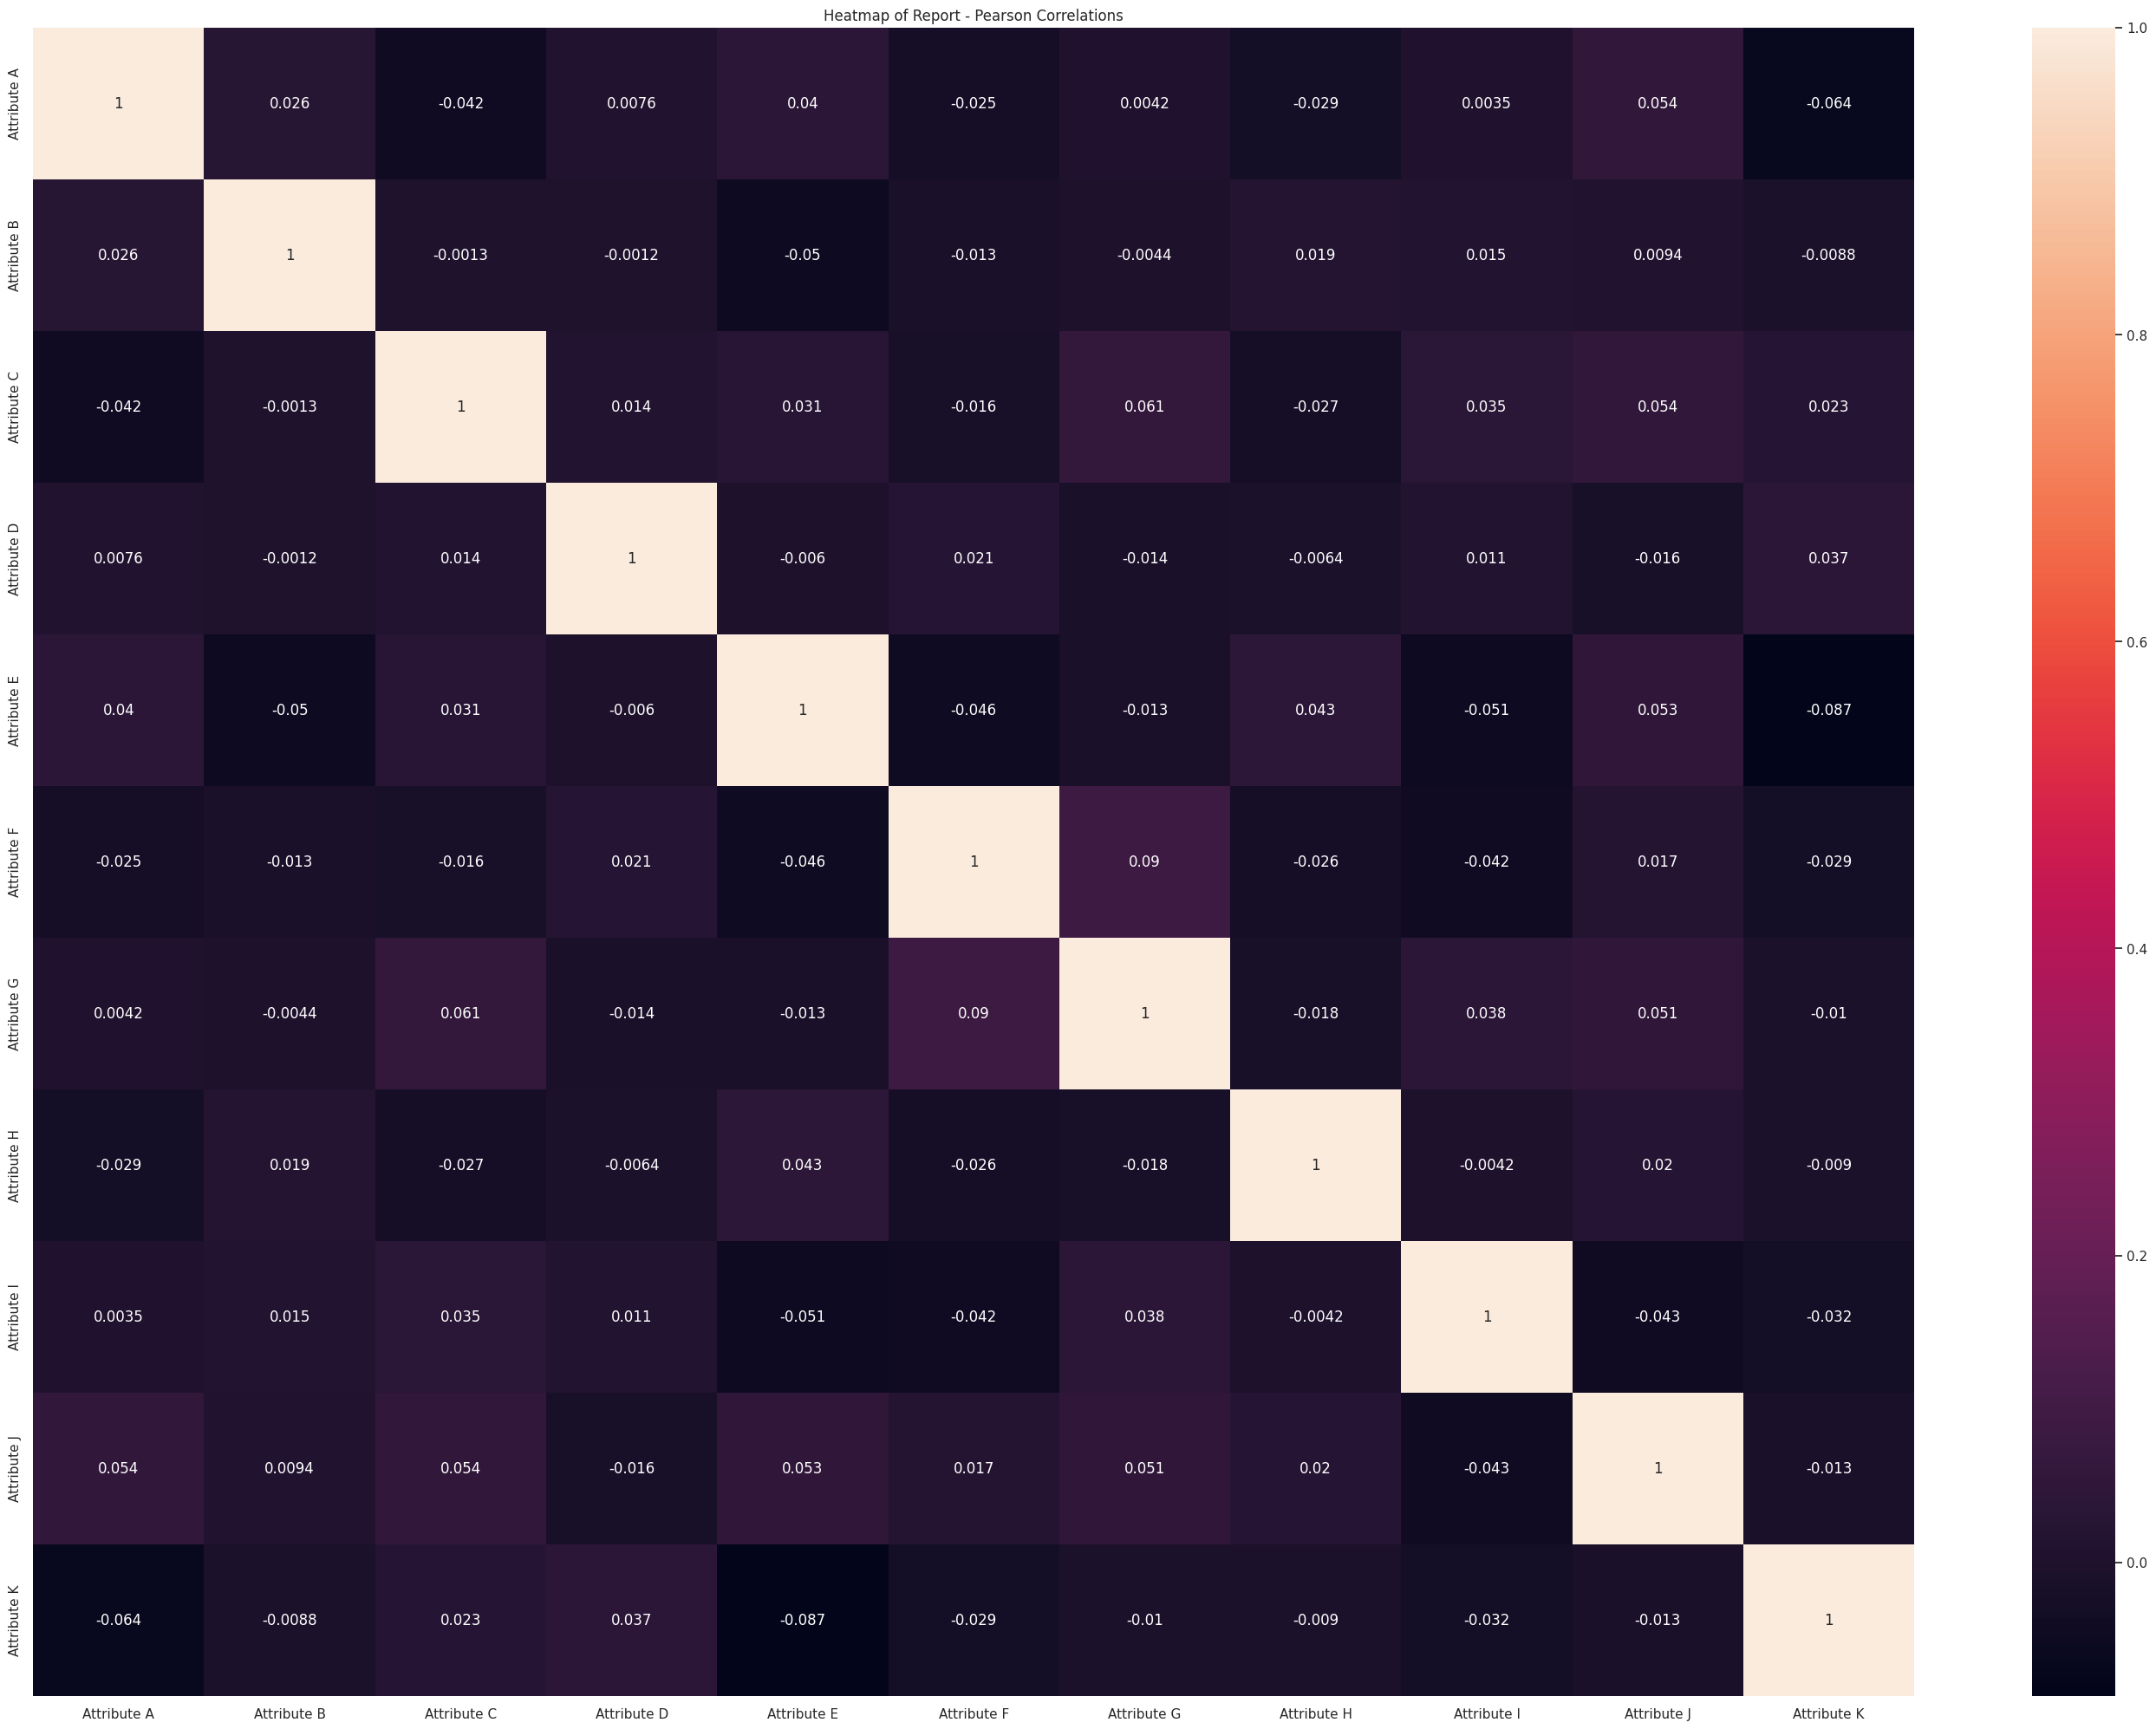

In [10]:

XX = y_imputed[['Attribute A', 'Attribute B', 'Attribute C', 'Attribute D','Attribute E', 'Attribute F','Attribute G','Attribute H','Attribute I','Attribute J','Attribute K']]

XX

type(XX)

diff_var = y_imputed[['Attribute A', 'Attribute B', 'Attribute C', 'Attribute D','Attribute E', 'Attribute F','Attribute G','Attribute H','Attribute I','Attribute J','Attribute K']]

diff_var.shape

corr_m = diff_var.corr()
corr_m


sns.heatmap(corr_m, annot=True).set(title='Heatmap of Report - Pearson Correlations')



In [11]:

minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(XX)
XX = pd.DataFrame(minmax_scaled, columns=XX.columns)
print(XX)

y = y_imputed['Target']
y

X_train, X_test, y_train, y_test = train_test_split(XX, y,test_size=0.1,random_state=SEED)

print(X_train)

print(y_train)


     Attribute A  Attribute B  Attribute C  Attribute D  Attribute E  \
0       0.006420     0.322344     0.450204     0.934053     0.670624   
1       0.717868     0.790616     0.765062     0.811245     0.987484   
2       0.155828     0.459472     0.138793     0.034835     0.869364   
3       0.543799     0.967004     0.325590     0.210560     0.595315   
4       0.982945     0.920278     0.537704     0.719928     0.981893   
..           ...          ...          ...          ...          ...   
995     0.956968     0.083068     0.653825     0.045392     0.313742   
996     0.472532     0.241647     0.763857     0.276203     0.406384   
997     0.229606     0.739953     0.626775     0.550194     0.120863   
998     0.465454     0.442185     0.290369     0.971249     0.287822   
999     0.607866     0.753161     0.047060     0.397965     0.086484   

     Attribute F  Attribute G  Attribute H  Attribute I  Attribute J  \
0       0.894892     0.511538     0.324218     0.614786     0.5

In [12]:

"""## Linear regression"""

regressor = LinearRegression()

regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

y_pred = regressor.predict(X_test)
print(y_pred)

dataframe_pred = pd.DataFrame({'Observed': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
dataframe_pred

feature_names = XX.columns
feature_names

model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients,index = feature_names,columns = ['Coefficient value'])
print(coefficients_df)


0.5124113259378898
[-0.05816653  0.0096116  -0.04331733  0.03724656 -0.05319238 -0.04481976
  0.04380265 -0.01335813  0.02733255  0.04867315  0.04520702]
[0.58216422 0.45347205 0.53293562 0.56700312 0.49283222 0.47847971
 0.52470192 0.57983304 0.59580393 0.49477455 0.50150604 0.56934801
 0.45485036 0.53008031 0.4806246  0.58079688 0.57853403 0.5371582
 0.48112212 0.49919796 0.58685267 0.47470194 0.54873321 0.45342742
 0.52699359 0.50881081 0.59797315 0.46422759 0.506993   0.52268438
 0.54808991 0.52040352 0.51523758 0.54932708 0.50503712 0.56159397
 0.44290306 0.46152116 0.53888415 0.50030921 0.53840762 0.43922378
 0.52697684 0.55787579 0.47666918 0.44292703 0.51754444 0.49358847
 0.50297346 0.56010801 0.54108992 0.58814206 0.5355399  0.4879051
 0.54013789 0.56070924 0.52341803 0.53226134 0.55102009 0.50358711
 0.47545123 0.5523222  0.50773512 0.55924383 0.53111512 0.54458587
 0.5077073  0.43566735 0.5742962  0.49965674 0.59601085 0.42872026
 0.5205156  0.51298942 0.53544332 0.45756365

In [13]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
Coefficient_of_determination = r2_score(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of determination: {Coefficient_of_determination:.2f}')

rcParams['figure.figsize'] = 15,10
sns.set(font_scale = 1)



Mean absolute error: 0.24
Mean squared error: 0.08
Root mean squared error: 0.28
Coefficient of determination: -0.02
